In [7]:
import sys
import os
import pandas as pd

# Añadir el directorio raíz del proyecto al PYTHONPATH
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import quantstats as qs

In [17]:
BTC_ORIGINAL_RET = pd.read_parquet(r'C:\Users\adelapuente\Desktop\math_tfm\04_validation\BTC_original_returns.parquet')
BTC_VOLUME_RET = pd.read_parquet(r'C:\Users\adelapuente\Desktop\math_tfm\04_validation\BTC_volume_returns.parquet')
BTC_DOLLAR_RET = pd.read_parquet(r'C:\Users\adelapuente\Desktop\math_tfm\04_validation\BTC_dollar_returns.parquet')

SPY_ORIGINAL_RET = pd.read_parquet(r'C:\Users\adelapuente\Desktop\math_tfm\04_validation\SPY_original_returns.parquet')
SPY_VOLUME_RET = pd.read_parquet(r'C:\Users\adelapuente\Desktop\math_tfm\04_validation\SPY_volume_returns.parquet')
SPY_DOLLAR_RET = pd.read_parquet(r'C:\Users\adelapuente\Desktop\math_tfm\04_validation\SPY_dollar_returns.parquet')


In [3]:
BTC_VOLUME_RET.head()

,date,close,BTC Buy&Hold,predicted_actions,real_actions_taken,SPY_pred_actions_returns,SPY_real_actions_returns
0,2024-01-01 15:13:00,43757.39,0.005269,0,0,0.0,0.0
1,2024-01-01 16:37:00,43572.71,-0.004221,-1,0,0.0,0.0
2,2024-01-01 18:04:00,43720.64,0.003395,0,0,0.0,0.0
3,2024-01-01 18:26:00,43911.50,0.004365,0,0,0.0,0.0
4,2024-01-01 18:28:00,43988.00,0.001742,0,0,0.0,0.0


In [9]:
BTC_VOLUME_RET['predicted_actions'].value_counts()

predicted_actions
 0    7310
-1    2798
 1    1506
Name: count, dtype: int64

In [10]:
BTC_ORIGINAL_RET.set_index('date', inplace=True)
qs.reports.html(returns = BTC_ORIGINAL_RET['BTC_real_actions_returns'], benchmark=BTC_ORIGINAL_RET['BTC Buy&Hold'], title= "BTC PPO Strategy VS Buy&Hold", output="BTC_original_vs_buy&hold.html")

In [18]:
BTC_VOLUME_RET.set_index('date', inplace=True)
qs.reports.html(returns = BTC_VOLUME_RET['BTC_real_actions_returns'], benchmark=BTC_VOLUME_RET['BTC Buy&Hold'], title= "BTC Volume PPO Strategy VS Buy&Hold", output="BTC_volume_vs_buy&hold.html")

In [19]:
BTC_DOLLAR_RET.set_index('date', inplace=True)
qs.reports.html(returns = BTC_DOLLAR_RET['BTC_real_actions_returns'], benchmark=BTC_DOLLAR_RET['BTC Buy&Hold'], title= "BTC Dollar PPO Strategy VS Buy&Hold", output="BTC_dollar_vs_buy&hold.html")

In [33]:
SPY_ORIGINAL_RET.set_index('date', inplace=True)
qs.reports.html(returns = SPY_ORIGINAL_RET['SPY_real_actions_returns'], benchmark=SPY_ORIGINAL_RET['SPY Buy&Hold'], title= "SPY PPO Strategy VS Buy&Hold", output="SPY_original_vs_buy&hold.html")

In [32]:
SPY_VOLUME_RET.set_index('date', inplace=True)
qs.reports.html(returns = SPY_VOLUME_RET['SPY_real_actions_returns'], benchmark=SPY_VOLUME_RET['SPY Buy&Hold'], title= "SPY VOLUME PPO Strategy VS Buy&Hold", output="SPY_volume_vs_buy&hold.html")

In [31]:
SPY_DOLLAR_RET.set_index('date', inplace=True)
qs.reports.html(returns = SPY_DOLLAR_RET['SPY_real_actions_returns'], benchmark=SPY_DOLLAR_RET['SPY Buy&Hold'], title= "SPY DOLLAR PPO Strategy VS Buy&Hold", output="SPY_dollar_vs_buy&hold.html")

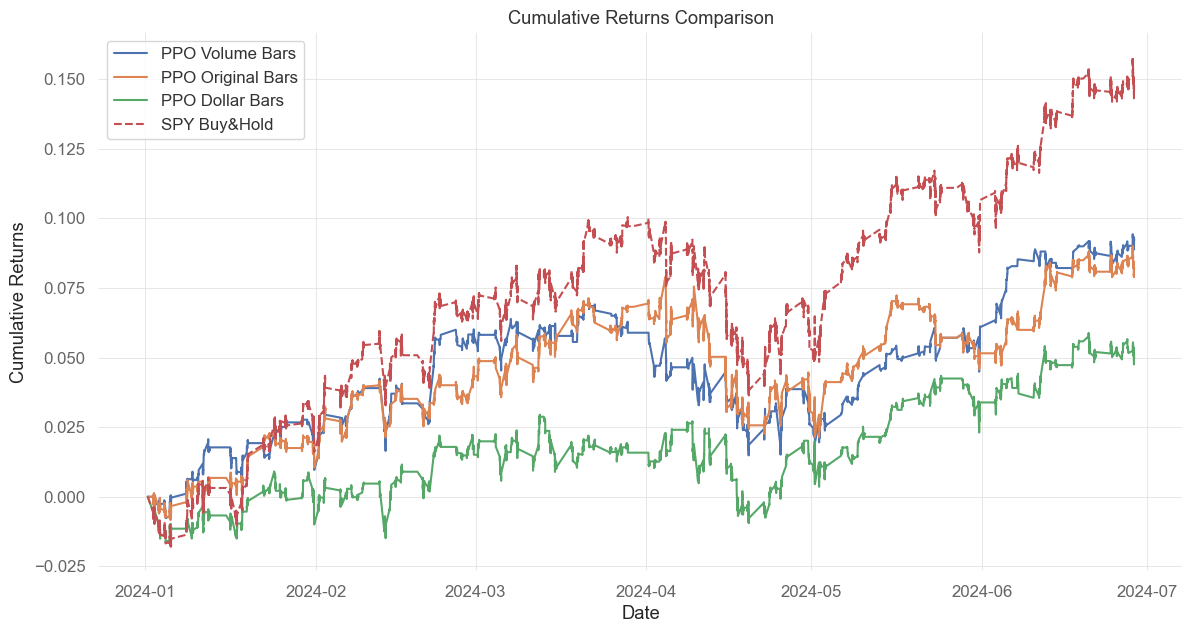

In [34]:
spy_dollar_ret = SPY_DOLLAR_RET['SPY_real_actions_returns']
spy_volume_ret = SPY_VOLUME_RET['SPY_real_actions_returns']
spy_original_ret = SPY_ORIGINAL_RET['SPY_real_actions_returns']
benchmark_returns = SPY_ORIGINAL_RET['SPY Buy&Hold']


# Crear figura
plt.figure(figsize=(14, 7))

# Calcular el "cumulative returns" de las estrategias y del benchmark
cumulative_returns_strategy1 = (1 + spy_volume_ret).cumprod() - 1
cumulative_returns_strategy2 = (1 + spy_original_ret).cumprod() - 1
cumulative_returns_strategy3 = (1 + spy_dollar_ret).cumprod() - 1
cumulative_returns_benchmark = (1 + benchmark_returns).cumprod() - 1

# Graficar
plt.plot(cumulative_returns_strategy1, label='PPO Volume Bars')
plt.plot(cumulative_returns_strategy2, label='PPO Original Bars')
plt.plot(cumulative_returns_strategy3, label='PPO Dollar Bars')
plt.plot(cumulative_returns_benchmark, label='SPY Buy&Hold', linestyle='--')

# Agregar etiquetas y título
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()

# Mostrar el gráfico
plt.show()


In [35]:
sharpe_ratio_strategy4 = qs.stats.sharpe(spy_dollar_ret)
sharpe_ratio_strategy1 = qs.stats.sharpe(spy_volume_ret)
sharpe_ratio_strategy2 = qs.stats.sharpe(spy_original_ret)
sharpe_ratio_strategy3 = qs.stats.sharpe(benchmark_returns)

print(f'Strategy 1 Sharpe Ratio: {sharpe_ratio_strategy1}')
print(f'Strategy 2 Sharpe Ratio: {sharpe_ratio_strategy2}')
print(f'Strategy 3 Sharpe Ratio: {sharpe_ratio_strategy3}')
print(f'Strategy 4 Sharpe Ratio: {sharpe_ratio_strategy4}')

Strategy 1 Sharpe Ratio: 0.38023173957824025
Strategy 2 Sharpe Ratio: 0.0921272176617243
Strategy 3 Sharpe Ratio: 0.1301399332841594
Strategy 4 Sharpe Ratio: 0.14323358509695466


In [36]:
import numpy as np
# Función para calcular Beta manualmente
def calculate_beta(strategy_returns: pd.Series, benchmark_returns: pd.Series):
    covariance_matrix = np.cov(strategy_returns, benchmark_returns)
    beta = covariance_matrix[0, 1] / covariance_matrix[1, 1]
    return beta

# Función para calcular Alpha manualmente
def calculate_alpha(strategy_returns: pd.Series, benchmark_returns: pd.Series, rf_rate: float = 0.0):
    beta = calculate_beta(strategy_returns, benchmark_returns)
    excess_strategy_returns = strategy_returns.mean() - rf_rate
    excess_benchmark_returns = benchmark_returns.mean() - rf_rate
    alpha = excess_strategy_returns - beta * excess_benchmark_returns
    return alpha * 252  # Annualizar el alpha

# Función para calcular las estadísticas
def calculate_statistics(returns: pd.Series, benchmark: pd.Series):
    stats = {
        'Cumulative Returns': qs.stats.compsum(returns).iloc[-1],
        'Annualized Return': qs.stats.cagr(returns),
        'Volatility': qs.stats.volatility(returns),
        'Sharpe Ratio': qs.stats.sharpe(returns),
        'Sortino Ratio': qs.stats.sortino(returns),
        'Maximum Drawdown': qs.stats.max_drawdown(returns),
        'Calmar Ratio': qs.stats.calmar(returns),
        'Value at Risk (VaR)': qs.stats.var(returns),
        'Alpha': calculate_alpha(returns, benchmark),
        'Beta': calculate_beta(returns, benchmark)
    }
    return stats


# Calculando estadísticas para cada estrategia y el benchmark
benchmark_stats = calculate_statistics(benchmark_returns, benchmark_returns)
ppo_original_stats = calculate_statistics(spy_original_ret, benchmark_returns)
ppo_volume_stats = calculate_statistics(spy_volume_ret, SPY_VOLUME_RET['SPY Buy&Hold'])
ppo_dollar_stats = calculate_statistics(spy_dollar_ret, SPY_DOLLAR_RET['SPY Buy&Hold'])

# Creando un DataFrame para mostrar las estadísticas
stats_df = pd.DataFrame({
    'Benchmark (S&P 500)': benchmark_stats,
    'PPO Original Bars': ppo_original_stats,
    'PPO Volume Bars': ppo_volume_stats,
    'PPO Dollar Bars': ppo_dollar_stats
})

# Transponer el DataFrame para una mejor visualización
stats_df = stats_df.T
stats_df


,Cumulative Returns,Annualized Return,Volatility,Sharpe Ratio,Sortino Ratio,Maximum Drawdown,Calmar Ratio,Value at Risk (VaR),Alpha,Beta
Benchmark (S&P 500),0.145722,0.211081,0.005454,0.130140,0.186415,-0.058220,3.625594,-0.000562,0.000000,1.000000
PPO Original Bars,0.081186,0.116158,0.004435,0.092127,0.130289,-0.053463,2.172690,-0.000458,-0.000061,0.661218
PPO Volume Bars,0.091928,0.131802,0.017171,0.380232,0.532675,-0.051625,2.553085,-0.001753,-0.000503,0.697431
PPO Dollar Bars,0.050090,0.071231,0.010649,0.143234,0.206377,-0.037830,1.882934,-0.001097,-0.001197,0.652083
